In [474]:
import yfinance as yf
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [475]:
df = yf.download('TSLA', start = '2010-1-1', end = '2018-12-31', progress = False, auto_adjust = True)
df

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500
...,...,...,...,...,...
2018-12-21,21.160000,21.564667,20.829332,21.318001,120252000
2018-12-24,20.900000,20.966667,19.680000,19.692667,83398500
2018-12-26,20.000000,21.798000,19.606001,21.739332,122446500


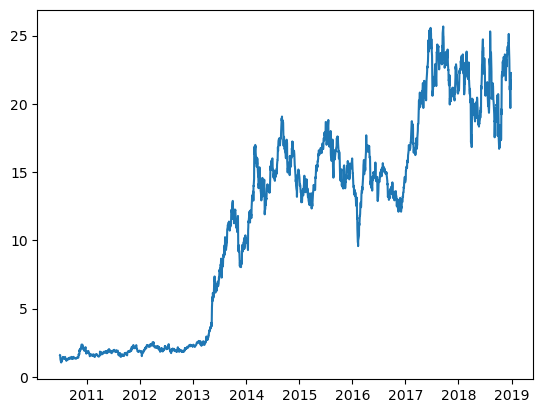

In [476]:
plt.plot(df.index,df.Close)

In [477]:
def BollingerBands(df,window_size=20):
    df['SMA'] = df.Close.rolling(window = window_size).mean()
    df['StdDev'] = df.Close.rolling(window = window_size).std()
    df['Upperband'] = df.SMA + 2*df.StdDev
    df['Lowerband'] = df.SMA - 2*df.StdDev
    return df

In [478]:
df1=BollingerBands(df)
df1

,Open,High,Low,Close,Volume,SMA,StdDev,Upperband,Lowerband
Date,,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,NaN,NaN,NaN,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,NaN,NaN,NaN,NaN
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,NaN,NaN,NaN,NaN
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,NaN,NaN,NaN,NaN
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2018-12-21,21.160000,21.564667,20.829332,21.318001,120252000,23.296900,1.127829,25.552559,21.041241
2018-12-24,20.900000,20.966667,19.680000,19.692667,83398500,23.195433,1.346970,25.889374,20.501493
2018-12-26,20.000000,21.798000,19.606001,21.739332,122446500,23.129067,1.385789,25.900645,20.357489


In [479]:
def RSI(df,window_size=13):
    Difference=df.Close.diff()
    Gain=Difference.where(Difference>0,0)
    Loss=Difference.where((Difference<0),0)
    Loss=Loss*(-1)
    AverageGain=Gain.rolling(window_size).mean()
    AverageLoss=Loss.rolling(window_size).mean()
    RS=AverageGain/AverageLoss
    #print(RS)
    RSI=100-(100/(1+RS))
    df['RSI']=RSI
    df=df.dropna()
    return df

In [480]:
df2=RSI(df1)
df2

,Open,High,Low,Close,Volume,SMA,StdDev,Upperband,Lowerband,RSI
Date,,,,,,,,,,
2010-07-27,1.394000,1.412000,1.350667,1.370000,9295500,1.324767,0.153098,1.630962,1.018572,67.616896
2010-07-28,1.370000,1.393333,1.367333,1.381333,7008000,1.314200,0.140401,1.595001,1.033399,68.693705
2010-07-29,1.384667,1.392000,1.333333,1.356667,9240000,1.302600,0.125303,1.553205,1.051995,68.539376
2010-07-30,1.346667,1.362667,1.303333,1.329333,6403500,1.295867,0.119665,1.535196,1.056537,60.948906
2010-08-02,1.366667,1.398000,1.355333,1.394667,10771500,1.301600,0.121596,1.544792,1.058408,57.200003
...,...,...,...,...,...,...,...,...,...,...
2018-12-21,21.160000,21.564667,20.829332,21.318001,120252000,23.296900,1.127829,25.552559,21.041241,29.534896
2018-12-24,20.900000,20.966667,19.680000,19.692667,83398500,23.195433,1.346970,25.889374,20.501493,22.696781
2018-12-26,20.000000,21.798000,19.606001,21.739332,122446500,23.129067,1.385789,25.900645,20.357489,37.261374


In [481]:
def strategy(df,Overbought=70,Oversold=30):
    Position=False
    BuyPrice=[]
    SellPrice=[]
    Pos=[]
    for i in range(len(df)):
        if df.Close[i]<df.Lowerband[i] and df.RSI[i]<Oversold and Position==False:
            Position=True
            BuyPrice.append(df.Close[i])
            SellPrice.append(None)
            Pos.append(Position)
        elif df.Close[i]>df.Upperband[i] and df.RSI[i]>Overbought and Position==True:
            Position=False
            BuyPrice.append(None)
            SellPrice.append(df.Close[i])
            Pos.append(Position) 
        else:
            BuyPrice.append(None)
            SellPrice.append(None)
            Pos.append(Position)
    return (BuyPrice,SellPrice,Pos)        
            
        

In [482]:
a,b,c=strategy(df2)
#print(a,b,c)
df2['BuyPrice']=a
df2['SellPrice']=b
df2['Position']=c
df2

C:\Users\karti\AppData\Local\Temp\ipykernel_26868\446956876.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BuyPrice']=a
C:\Users\karti\AppData\Local\Temp\ipykernel_26868\446956876.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['SellPrice']=b
C:\Users\karti\AppData\Local\Temp\ipykernel_26868\446956876.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,Open,High,Low,Close,Volume,SMA,StdDev,Upperband,Lowerband,RSI,BuyPrice,SellPrice,Position
Date,,,,,,,,,,,,,
2010-07-27,1.394000,1.412000,1.350667,1.370000,9295500,1.324767,0.153098,1.630962,1.018572,67.616896,NaN,NaN,False
2010-07-28,1.370000,1.393333,1.367333,1.381333,7008000,1.314200,0.140401,1.595001,1.033399,68.693705,NaN,NaN,False
2010-07-29,1.384667,1.392000,1.333333,1.356667,9240000,1.302600,0.125303,1.553205,1.051995,68.539376,NaN,NaN,False
2010-07-30,1.346667,1.362667,1.303333,1.329333,6403500,1.295867,0.119665,1.535196,1.056537,60.948906,NaN,NaN,False
2010-08-02,1.366667,1.398000,1.355333,1.394667,10771500,1.301600,0.121596,1.544792,1.058408,57.200003,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,21.160000,21.564667,20.829332,21.318001,120252000,23.296900,1.127829,25.552559,21.041241,29.534896,NaN,NaN,False
2018-12-24,20.900000,20.966667,19.680000,19.692667,83398500,23.195433,1.346970,25.889374,20.501493,22.696781,19.692667,NaN,True
2018-12-26,20.000000,21.798000,19.606001,21.739332,122446500,23.129067,1.385789,25.900645,20.357489,37.261374,NaN,NaN,True


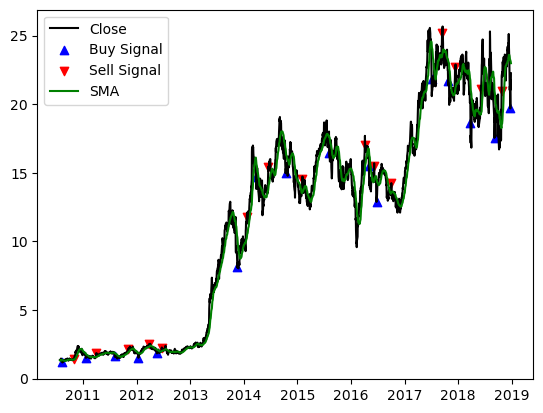

In [483]:
plt.plot(df2.index,df2.Close,color='black')
plt.scatter(df2.index, df2.BuyPrice, marker = '^', color = 'blue')
plt.scatter(df2.index, df2.SellPrice, marker = 'v', color = 'red')
plt.plot(df2.index,df2.SMA,color='green')
plt.legend(['Close','Buy Signal','Sell Signal','SMA'])

#plt.plot(df2.index,df2.Upperband)
#plt.plot(df2.index,df2.Lowerband)
#plt.plot(df2.index,df2.SMA)


In [484]:
dfp=pd.concat([df2.BuyPrice,df2.SellPrice,df2.Position],axis=1)
dfp.columns=['Buy','Sell','Position']
dfp

,Buy,Sell,Position
Date,,,
2010-07-27,NaN,NaN,False
2010-07-28,NaN,NaN,False
2010-07-29,NaN,NaN,False
2010-07-30,NaN,NaN,False
2010-08-02,NaN,NaN,False
...,...,...,...
2018-12-21,NaN,NaN,False
2018-12-24,19.692667,NaN,True
2018-12-26,NaN,NaN,True


In [485]:
#!pip install pandas_datareader

In [486]:
benchmark_data = yf.download (tickers = "^GSPC", start = "2010-01-01", 
                              end = "2018-12-31")
benchmark_data['Benchmark_Return'] = benchmark_data['Close'].pct_change()
benchmark_cumulative_return = (benchmark_data['Benchmark_Return'].dropna() + 1).cumprod() - 1
#print("Benchmark Cumulative Return (S&P 500 Index): {:.2f}%".format(benchmark_cumulative_return.iloc[-1] * 100))

[*********************100%%**********************]  1 of 1 completed


In [487]:
buy = dfp['Buy'].dropna().tolist()
sell = dfp['Sell'].dropna().tolist()
rel_profit=[]
ProfitTrades=[]
LossTrades=[]
years=9
window=252
Roll_Max = df2['Close'].rolling(window, min_periods=1).max()
Daily_Drawdown = df2['Close']/Roll_Max - 1.0
Max_Daily_Drawdown = Daily_Drawdown.rolling(window, min_periods=1).min()
for i in range(len(sell)):
    if sell[i]<buy[i]:
        LossTrades.append(sell[i]-buy[i])
    else:
        ProfitTrades.append(sell[i]-buy[i])
ProfitTrades.sort()
LossTrades.sort()
for i in range(len(sell)):
    rel_profit.append((sell[i]-buy[i])/buy[i])
    
#Result=sum(rel_profit)/len(rel_profit)
Result=(sell[-1]-buy[0])/buy[0]
TotalResult=Result*100
ExecutedTrades=len(sell) # 1 Executed trades is considered here as 1 buy and 1 sell collectively
WinRatio=len(ProfitTrades)/(len(ProfitTrades)+len(LossTrades))*100
AnnualizedReturn=((sell[-1])/buy[0])**(1/years)-1
print("TotalResult: {:.2f}%".format(TotalResult))
print("Benchmark Cumulative Return (S&P 500 Index): {:.2f}%".format(benchmark_cumulative_return.iloc[-1] * 100))
print("Executed Trades: {:.2f}".format(ExecutedTrades))
print("Profit Trades: {:.2f}".format(len(ProfitTrades)))
print("Loss Trades: {:.2f}".format(len(LossTrades)))
print("Win Percentage: {:.2f}".format(WinRatio))
print("Largest Loss: {:.2f}".format(LossTrades[0]))
print("Largest Profit: {:.2f}".format(ProfitTrades[-1]))
print("Maximum Drawdown: {:.2f}".format(abs(min(Max_Daily_Drawdown))))
print("Annualized Return: {:.2f}%".format(AnnualizedReturn*100))

TotalResult: 1658.99%
Benchmark Cumulative Return (S&P 500 Index): 119.40%
Executed Trades: 15.00
Profit Trades: 14.00
Loss Trades: 1.00
Win Percentage: 93.33
Largest Loss: -0.42
Largest Profit: 3.67
Maximum Drawdown: 0.49
Annualized Return: 37.52%


In [488]:
dfp.to_csv('summary.csv')